In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
TRAIN_DIR = r'C:\Users\AE-PC-23\Downloads\images\train'
TEST_DIR = r'C:\Users\AE-PC-23\Downloads\images\validation'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                                   image     label
0      C:\Users\AE-PC-23\Downloads\images\train\angry...     angry
1      C:\Users\AE-PC-23\Downloads\images\train\angry...     angry
2      C:\Users\AE-PC-23\Downloads\images\train\angry...     angry
3      C:\Users\AE-PC-23\Downloads\images\train\angry...     angry
4      C:\Users\AE-PC-23\Downloads\images\train\angry...     angry
...                                                  ...       ...
28816  C:\Users\AE-PC-23\Downloads\images\train\surpr...  surprise
28817  C:\Users\AE-PC-23\Downloads\images\train\surpr...  surprise
28818  C:\Users\AE-PC-23\Downloads\images\train\surpr...  surprise
28819  C:\Users\AE-PC-23\Downloads\images\train\surpr...  surprise
28820  C:\Users\AE-PC-23\Downloads\images\train\surpr...  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\AE-PC-23\Downloads\images\validation\...     angry
1     C:\Users\AE-PC-23\Downloads\images\validation\...     angry
2     C:\Users\AE-PC-23\Downloads\images\validation\...     angry
3     C:\Users\AE-PC-23\Downloads\images\validation\...     angry
4     C:\Users\AE-PC-23\Downloads\images\validation\...     angry
...                                                 ...       ...
7062  C:\Users\AE-PC-23\Downloads\images\validation\...  surprise
7063  C:\Users\AE-PC-23\Downloads\images\validation\...  surprise
7064  C:\Users\AE-PC-23\Downloads\images\validation\...  surprise
7065  C:\Users\AE-PC-23\Downloads\images\validation\...  surprise
7066  C:\Users\AE-PC-23\Downloads\images\validation\...  surprise

[7067 rows x 2 columns]
0       C:\Users\AE-PC-23\Downloads\images\validation\...
1       C:\Users\AE-PC-23\Downloads\images\validation\...
2       C:\Users\AE-PC-23\Downloads\images\validation\...
3       C

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\AE-PC-23\AppData\Roaming\Python\Python39\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7067 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 2, validation_data = (x_test,y_test)) 

Epoch 1/2


226/226 [==============================] - 307s 1s/step - loss: 1.8234 - accuracy: 0.2439 - val_loss: 1.8154 - val_accuracy: 0.2582
Epoch 2/2
226/226 [==============================] - 312s 1s/step - loss: 1.8120 - accuracy: 0.2484 - val_loss: 1.7941 - val_accuracy: 0.2464


In [20]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\AE-PC-23\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
from keras.models import model_from_json

In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [25]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [26]:
image = r'C:\Users\AE-PC-23\Downloads\images\train\sad\42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\AE-PC-23\AppData\Roaming\Python\Python39\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 314ms/step
model prediction is  happy


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad


C:\Users\AE-PC-23\AppData\Roaming\Python\Python39\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 109ms/step
model prediction is  happy


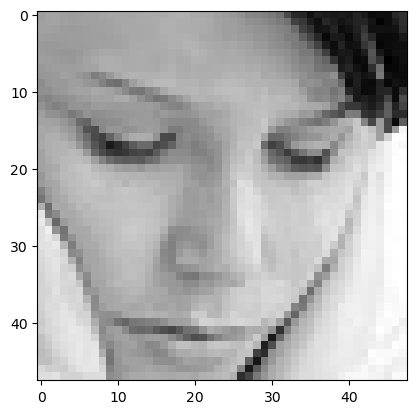

In [28]:
image = r'C:\Users\AE-PC-23\Downloads\images\train\sad\42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 150ms/step
model prediction is  disgust


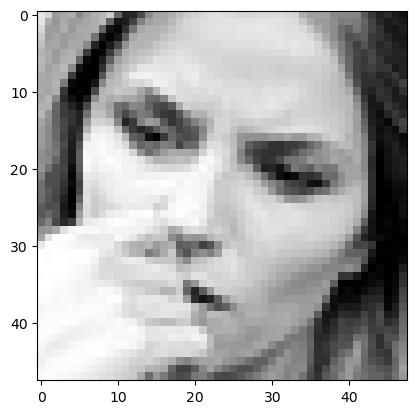

In [29]:
image = r'C:\Users\AE-PC-23\Downloads\images\train\fear\2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 78ms/step
model prediction is  disgust


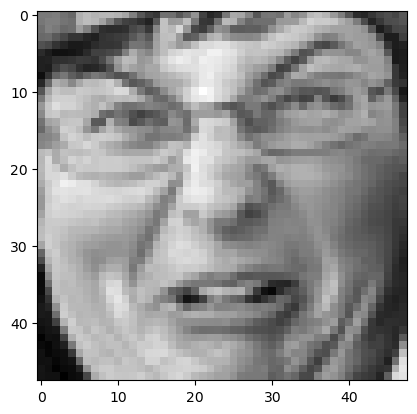

In [30]:
image = r'C:\Users\AE-PC-23\Downloads\images\train\disgust\299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 64ms/step
model prediction is  disgust


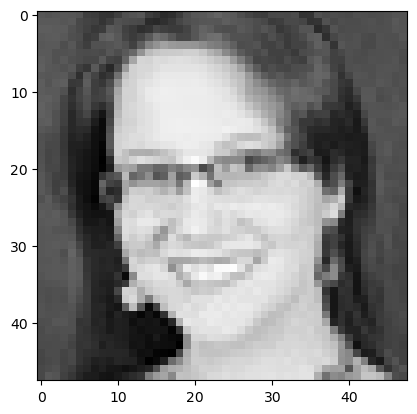

In [31]:
image = r'C:\Users\AE-PC-23\Downloads\images\train\happy\7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 43ms/step
model prediction is  disgust


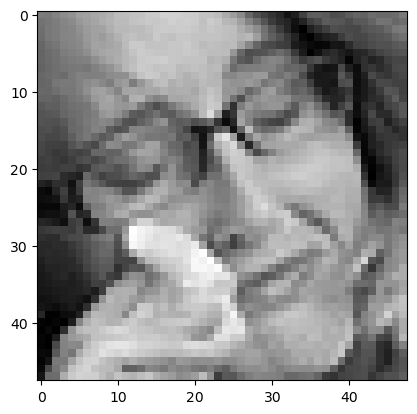

In [33]:
image = r'C:\Users\AE-PC-23\Downloads\images\validation\sad\922.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [35]:
image = r'C:\Users\AE-PC-23\Downloads\emoji.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(100,100),cmap='gray')

original image is of surprise


ValueError: cannot reshape array of size 1572864 into shape (1,48,48,1)